# Dataset Name: Podcast Listening Time Prediction

Dataset Description: The dataset contains information about various podcast episodes and their attributes. The goal is to analyze and predict the average listening duration of podcast episodes based on various features.

+ KAGGLE: https://www.kaggle.com/datasets/ysthehurricane/podcast-listening-time-prediction-dataset
+ GITHUB: https://github.com/Elvis-Jekir/podcast_prediction
+ PROJECT DOC: https://docs.google.com/document/d/1xQjaEexTHa1a5rTP1hojuEeUeI2ZYtSbmy4HSW950zk/edit?tab=t.0


**Columns in the Dataset:**

+ Podcast_Name (Type: string) - Names of popular podcasts.
+ Episode_Title (Type: string) - Titles of the podcast episodes.
+ Episode_Length (Type: float, minutes) - Length of the episode in minutes.
+ Genre (Type: string) - Genre of the podcast episode.
+ Host_Popularity (Type: float, scale 0-100) - A score indicating the popularity of the host.
+ Publication_Day (Type: string) - Day of the week the episode was published.
+ Publication_Time (Type: string) - Time of the day the episode was published.
+ Guest_Popularity (Type: float, scale 0-100) - A score indicating the popularity of the guest (if any).
+ Number_of_Ads (Type: int) - Number of advertisements within the episode.
+ Episode_Sentiment (Type: string) - Sentiment of the episode's content.
+ **Listening_Time (Type: float, minutes) - The actual average listening duration (target variable).**

In [311]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [312]:
# Read data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Exploratory Data Analysis

In [313]:
train_df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [314]:
test_df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,Mind & Body,Episode 100,21.05,Health,65.77,Saturday,Evening,96.40,3.0,Negative
249996,999996,Joke Junction,Episode 85,85.50,Comedy,41.47,Saturday,Night,30.52,2.0,Negative
249997,999997,Joke Junction,Episode 63,12.11,Comedy,25.92,Thursday,Evening,73.69,1.0,Neutral
249998,999998,Market Masters,Episode 46,113.46,Business,43.47,Friday,Night,93.59,3.0,Positive


In [315]:
train_df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [316]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [317]:
train_df.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [318]:
# Separate numeric and categorical columns
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

Numerical Columns:
['id', 'Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Listening_Time_minutes']


### Check Duplicate rows

In [319]:
train_df.duplicated().sum()

np.int64(0)

In [320]:
test_df.duplicated().sum()

np.int64(0)

there are no duplicate rows in both dataset

### Check Missing values

In [321]:
missing = train_df.isnull().sum()[train_df.isnull().sum() > 0]
print("Missing values in train:\n", missing)

Missing values in train:
 Episode_Length_minutes          87093
Guest_Popularity_percentage    146030
Number_of_Ads                       1
dtype: int64


In [322]:
missing = test_df.isnull().sum()[test_df.isnull().sum() > 0]
print("Missing values in test:\n", missing)

Missing values in test:
 Episode_Length_minutes         28736
Guest_Popularity_percentage    48832
dtype: int64


Training and testing datasets have a significant number of missing entries for "Episode_Length_minutes" and "Guest_Popularity_percentage."
Additionally, the training set has one missing value in "Number_of_Ads." These missing values will need to be addressed before modeling.

In [323]:
train_df.isnull().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,87093
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,146030
Number_of_Ads,1


In [324]:
test_df.isnull().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,28736
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,48832
Number_of_Ads,0


### Visualizations

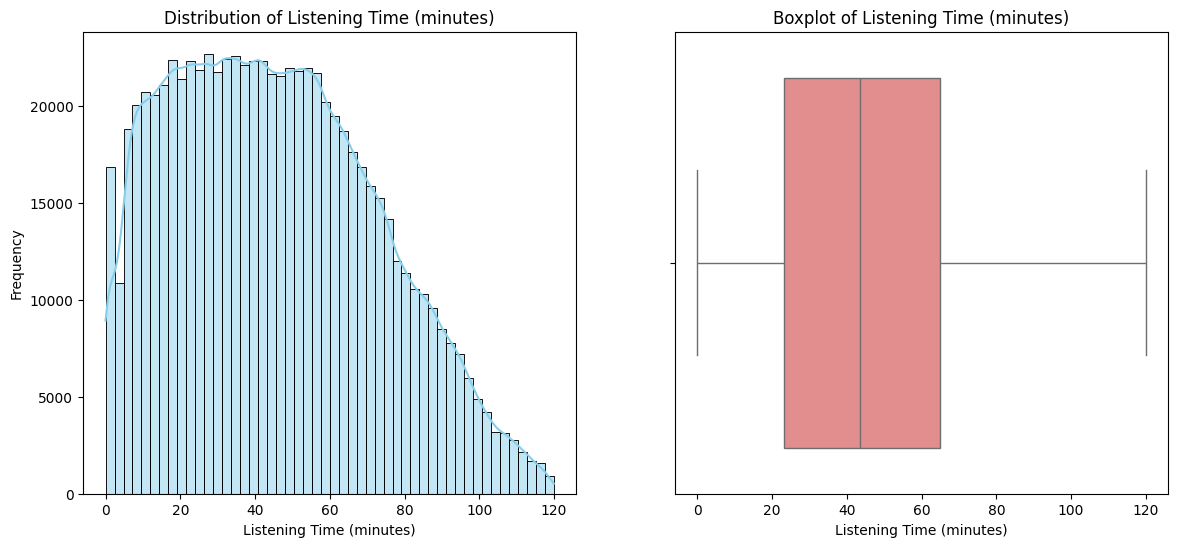

In [325]:
# Target dstribution
plt.figure(figsize=(14, 6))

# Histogram for distribution of values
plt.subplot(1, 2, 1)
sns.histplot(train_df['Listening_Time_minutes'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Listening Time (minutes)')
plt.xlabel('Listening Time (minutes)')
plt.ylabel('Frequency')

# Boxplot to check on the outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['Listening_Time_minutes'], color='lightcoral')
plt.title('Boxplot of Listening Time (minutes)')
plt.xlabel('Listening Time (minutes)')

plt.tight_layout
plt.show()

The distribution of listening time is right-skewed, with most users listening between 20 and 80 minutes.
The boxplot shows that the median is around 50 minutes, and there are few outliers beyond 100 minutes.

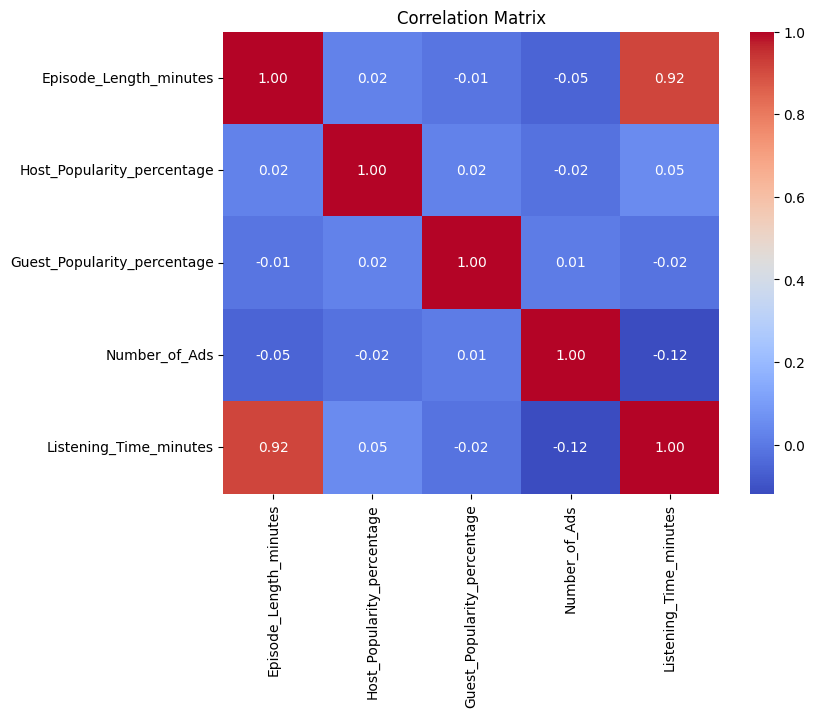

In [326]:
# Relation between numerical columns and target feature
num_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage',
            'Guest_Popularity_percentage', 'Number_of_Ads', 'Listening_Time_minutes']

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

There is a strong positive correlation (0.92) between episode length and listening time, meaning longer episodes naturally lead to more minutes listened.
However, this does not imply that longer episodes are more popular or more fully listened — it simply reflects that longer episodes allow for more total listening time.

Other variables, like Host and Guest Popularity or Number of Ads, show very weak or no correlation with Listening Time.

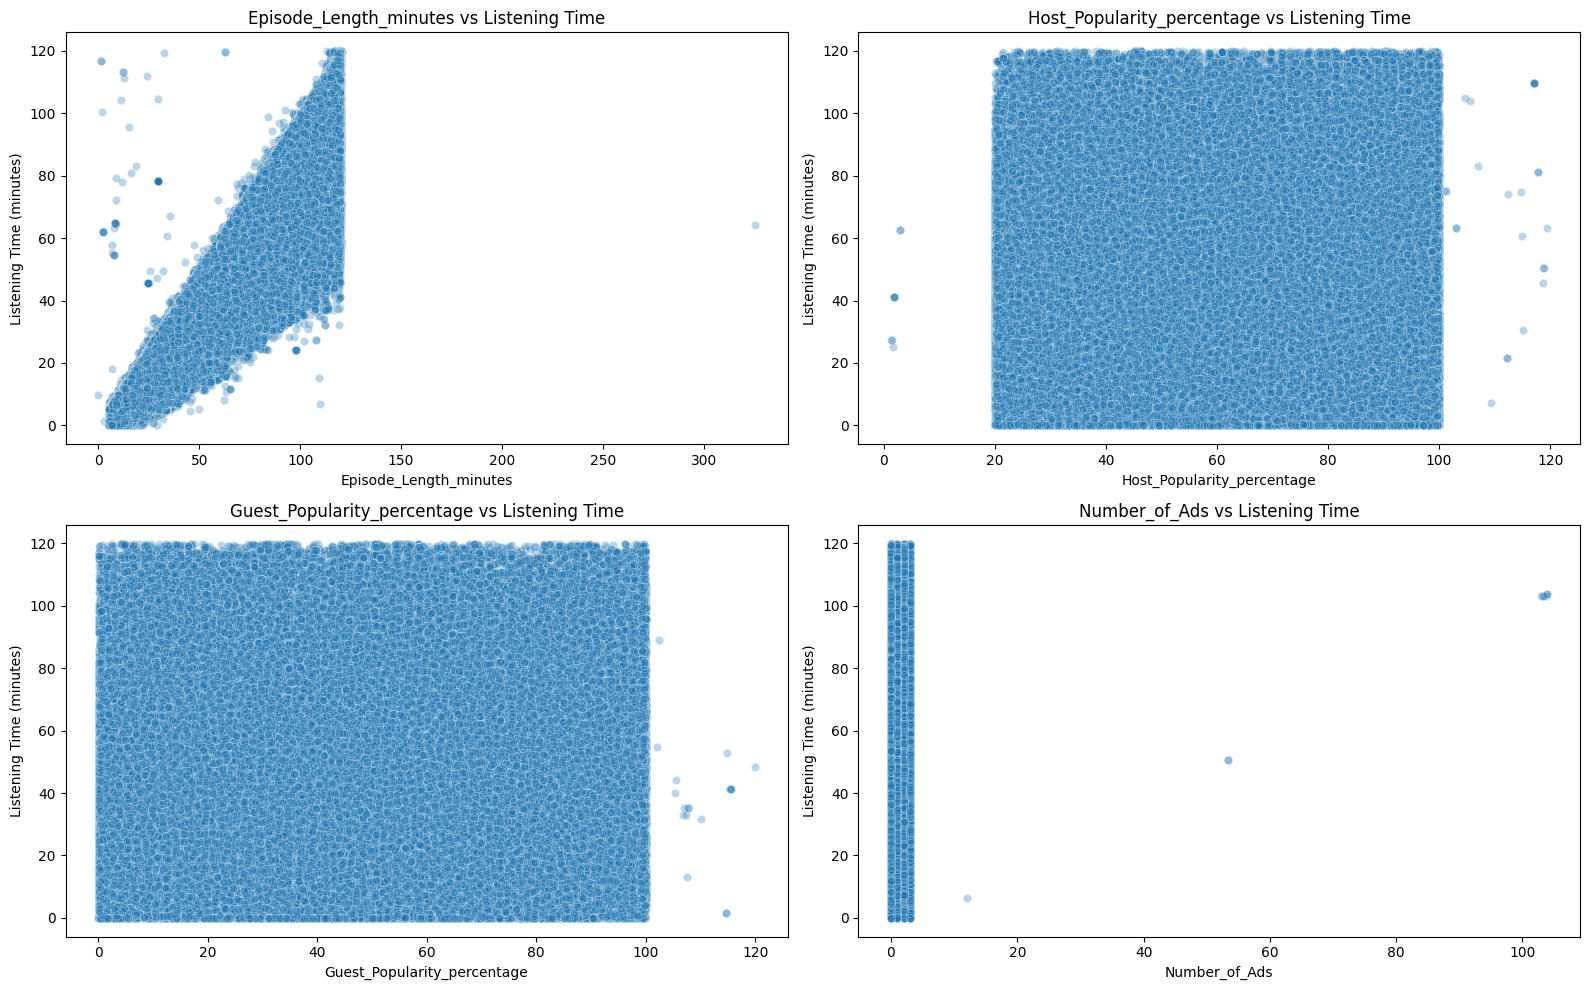

In [327]:
# List of numerical predictor variables
predictors = ['Episode_Length_minutes', 'Host_Popularity_percentage',
              'Guest_Popularity_percentage', 'Number_of_Ads']

plt.figure(figsize=(16, 10))

for i, col in enumerate(predictors):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=train_df[col], y=train_df['Listening_Time_minutes'], alpha=0.3)
    plt.title(f'{col} vs Listening Time')
    plt.xlabel(col)
    plt.ylabel('Listening Time (minutes)')

plt.tight_layout()
plt.show()


The scatter plots show that episode length has a strong positive relationship with listening time — longer episodes naturally lead to more minutes listened.
In contrast, host popularity, guest popularity, and the number of ads show no clear relationship with listening time, as the data points are widely scattered with no visible trend.

We can also notice from this graphs that we have some outliers to handle in order to get rid of the noise they could cause to the any model.

We got the following points:
+ Guest and Host satisfaction shouldn't exceed 100% as they are already rated in a percentage
+ We perceived that 'ads' doesn't usually exceed more than 3 per episode
+ The maximun episode lenght is 120 minutes
        

In [328]:
train_df['Number_of_Ads'].value_counts()

,count
Number_of_Ads,
0.00,217592
1.00,214069
3.00,160173
2.00,158156
103.25,2
53.37,1
103.00,1
103.91,1
53.42,1


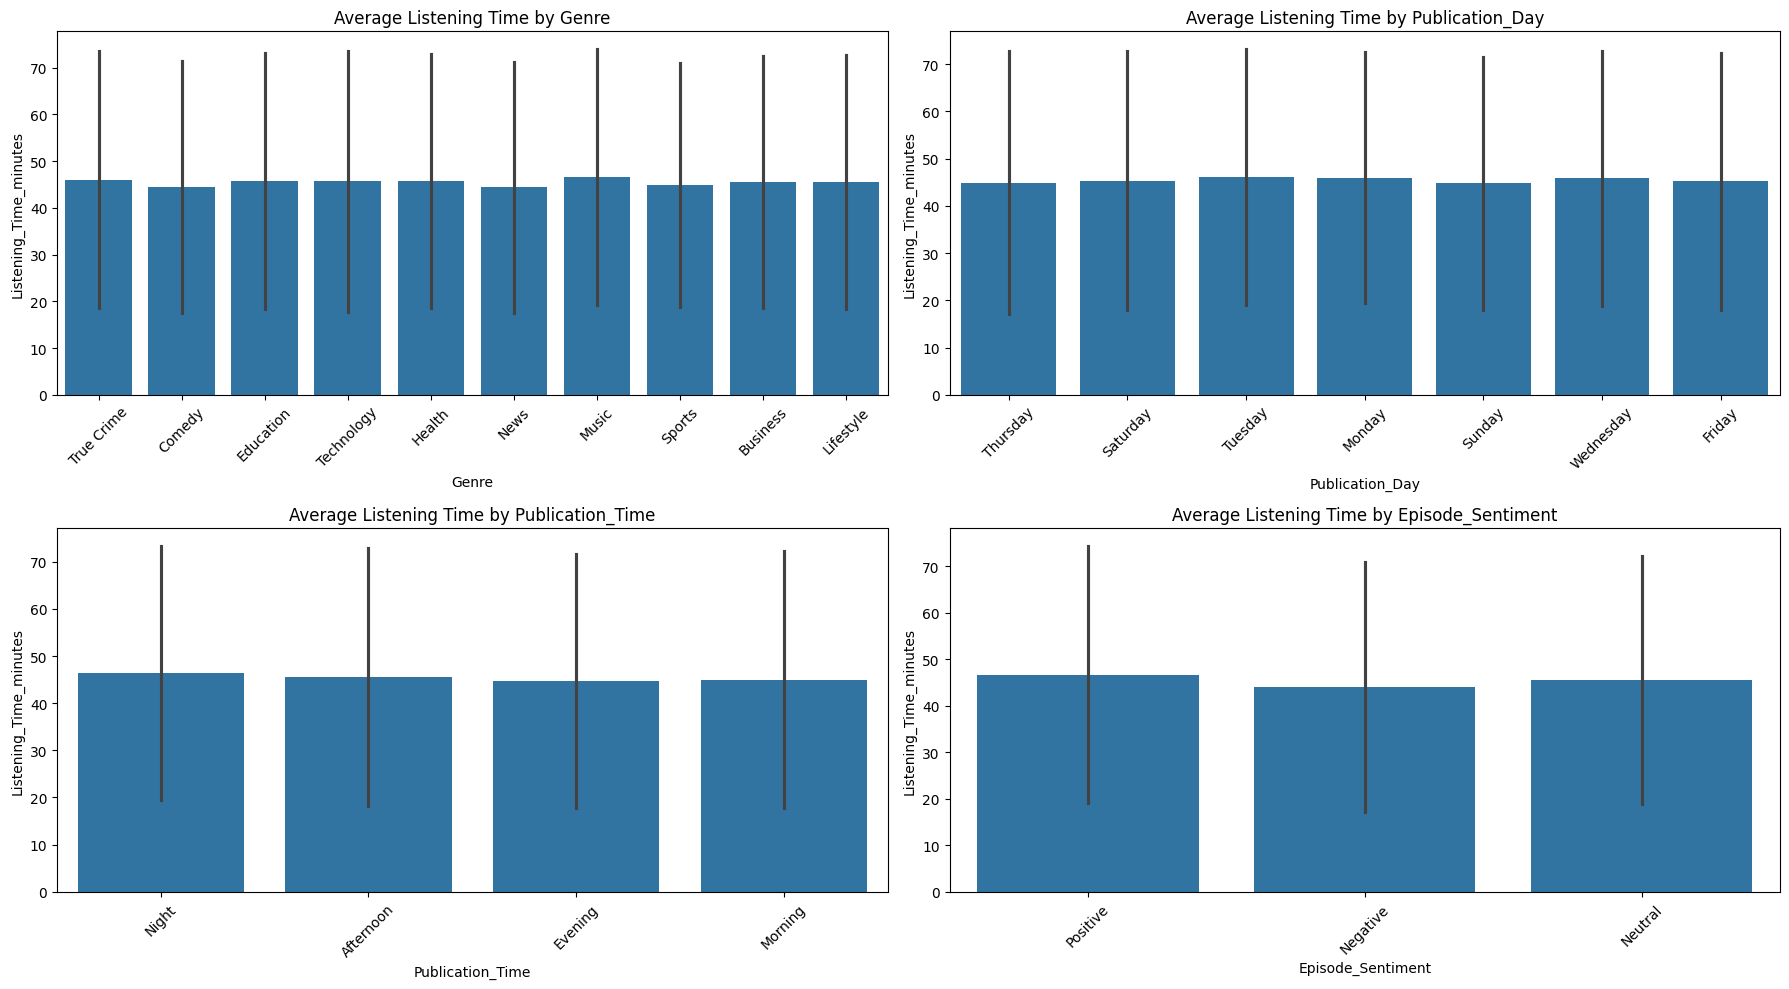

In [329]:
# Relation between categorical columns and target feature
cat_cols = ['Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

plt.figure(figsize=(18, 10))

for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=col, y='Listening_Time_minutes', data=train_df, estimator='mean', errorbar='sd')
    plt.xticks(rotation=45)
    plt.title(f'Average Listening Time by {col}')

plt.tight_layout()
plt.show()


The analysis indicates that average listening time remains relatively stable across different genres, publication days, publication times, and episode sentiments.
There are no major differences between categories, suggesting that these factors do not strongly influence how long users listen on average.

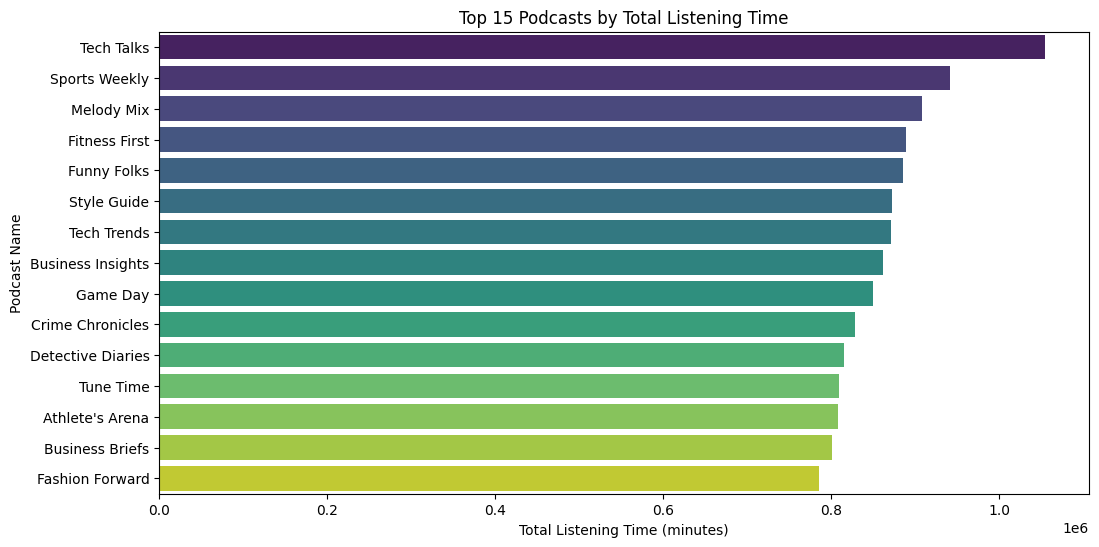

In [330]:
# Total of minutes listened per podcast
top_total = train_df.groupby('Podcast_Name')['Listening_Time_minutes'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_total.values, y=top_total.index, palette='viridis')
plt.title('Top 15 Podcasts by Total Listening Time')
plt.xlabel('Total Listening Time (minutes)')
plt.ylabel('Podcast Name')
plt.show()

Tech Talks stands out with a clear lead, while the other podcasts show only small differences in total listening time, suggesting a relatively close level of audience engagement among them.

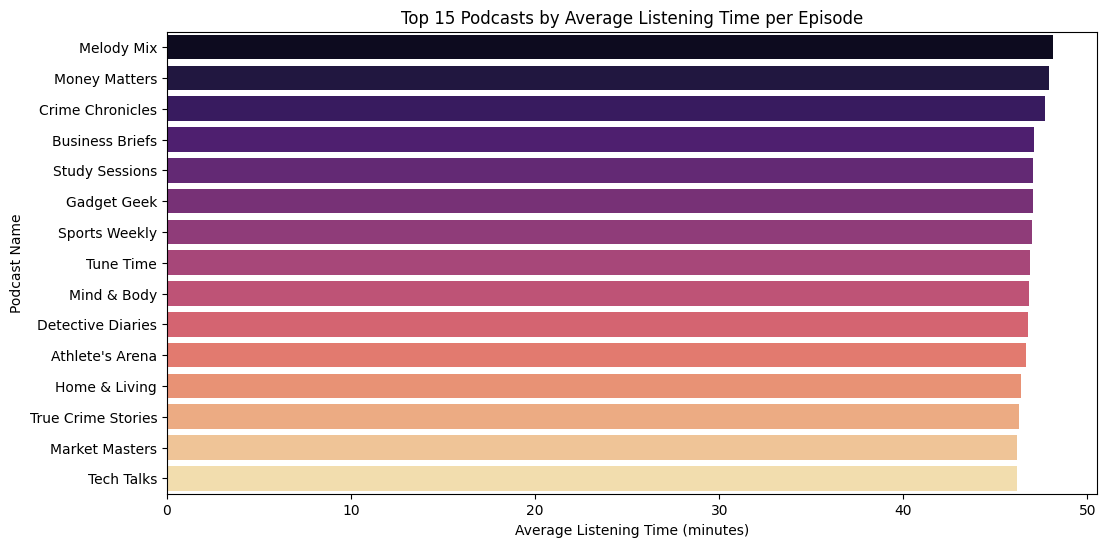

In [331]:
top_avg = train_df.groupby('Podcast_Name')['Listening_Time_minutes'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_avg.values, y=top_avg.index, palette='magma')
plt.title('Top 15 Podcasts by Average Listening Time per Episode')
plt.xlabel('Average Listening Time (minutes)')
plt.ylabel('Podcast Name')
plt.show()


Most podcasts have an average listening time per episode between 45 and 50 minutes, showing a high level of consistency across the top 15 podcasts, with only minor variations between them.

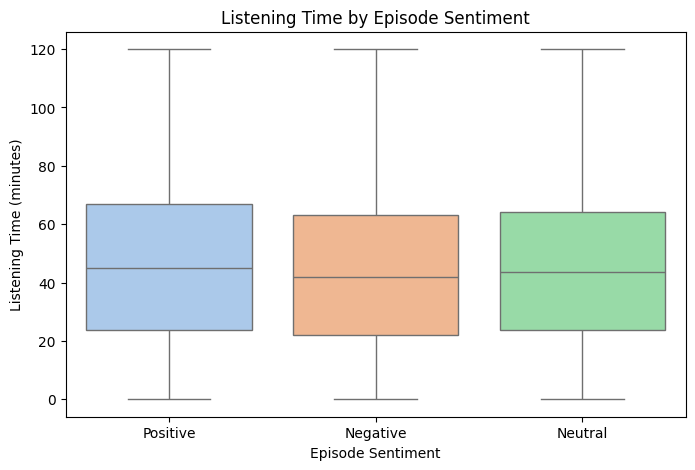

In [332]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Episode_Sentiment', y='Listening_Time_minutes', data=train_df, palette='pastel')
plt.title('Listening Time by Episode Sentiment')
plt.xlabel('Episode Sentiment')
plt.ylabel('Listening Time (minutes)')
plt.show()

There are no major differences in medians or ranges, suggesting that episode sentiment has minimal impact on how long users listen.

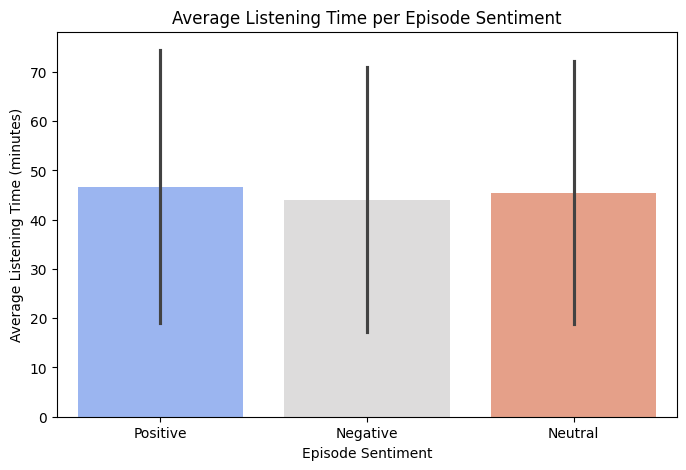

In [333]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Episode_Sentiment', y='Listening_Time_minutes', data=train_df, estimator='mean', errorbar='sd', palette='coolwarm')
plt.title('Average Listening Time per Episode Sentiment')
plt.xlabel('Episode Sentiment')
plt.ylabel('Average Listening Time (minutes)')
plt.show()

Episodes with positive sentiment have slightly higher average listening times compared to negative and neutral episodes.
However, the differences are small, suggesting that episode sentiment has only a minor influence on average listening behavior.

In [334]:
genre_counts = train_df['Genre'].value_counts()
genre_percent = train_df['Genre'].value_counts(normalize=True) * 100

# Merge into a single DataFrame for better viewing
genre_summary = pd.DataFrame({
    'Count': genre_counts,
    'Percentage (%)': genre_percent.round(2)
})

display(genre_summary)


,Count,Percentage (%)
Genre,,
Sports,87606,11.68
Technology,86256,11.50
True Crime,85059,11.34
Lifestyle,82461,10.99
Comedy,81453,10.86
Business,80521,10.74
Health,71416,9.52
News,63385,8.45
Music,62743,8.37


The genre distribution analysis shows that the dataset is relatively balanced among the top genres, with "Sports," "Technology," and "True Crime" being the most frequent, each representing around 11% of the data. The least represented genre is "Education," accounting for 6.5% of the episodes.

In [335]:
# Group by genre and calculate average Listening Time
genre_listening = train_df.groupby('Genre')['Listening_Time_minutes'].mean().round(2)

# Add it to the summary
genre_summary['Avg Listening Time (min)'] = genre_listening

display(genre_summary.sort_values(by='Count', ascending=False))

,Count,Percentage (%),Avg Listening Time (min)
Genre,,,
Sports,87606,11.68,44.94
Technology,86256,11.50,45.63
True Crime,85059,11.34,46.04
Lifestyle,82461,10.99,45.52
Comedy,81453,10.86,44.43
Business,80521,10.74,45.54
Health,71416,9.52,45.74
News,63385,8.45,44.41
Music,62743,8.37,46.58


The combined genre analysis shows that while the distribution of episodes across genres is relatively balanced, the average listening time per episode remains highly consistent, typically between 44 and 46 minutes. Genres like "Music" and "True Crime" slightly stand out with the highest average listening times.

# DATA Preprocessing

### Corrections – Out-of-Range Data Points
1. **Host/Guest_Popularity**: No value should exceed 100%. Correct all values above this threshold.
2. **Number_of_Ads**: Values higher than 3 are considered errors based on the distribution analysis. Cap all values at 3.
3. **Episode_Length_minutes**: Should not exceed 120 minutes. Cap all values at 120.

### Handling Missing Values
4. **Episode_Length_minutes**: Impute missing values by calculating the median grouped by 'Podcast_Name' and 'Genre', for a more precise estimation.
5. **Guest_Popularity_percentage**: Since 19.5% of the values are missing, create a missing value indicator and impute missing values using the global median.

### Dropping Features
6. **Episode_Title**: This feature will be dropped, as it provides no relevant information for the analysis.

In [336]:
# 1. Host/Guest_Popularity: Cap all values at 100%
train_df.loc[train_df['Host_Popularity_percentage'] > 100, 'Host_Popularity_percentage'] = 100
test_df.loc[test_df['Host_Popularity_percentage'] > 100, 'Host_Popularity_percentage'] = 100

train_df.loc[train_df['Guest_Popularity_percentage'] > 100, 'Guest_Popularity_percentage'] = 100
test_df.loc[test_df['Guest_Popularity_percentage'] > 100, 'Guest_Popularity_percentage'] = 100

# 2. Number_of_Ads: Cap all values at 3
train_df.loc[train_df['Number_of_Ads'] > 3, 'Number_of_Ads'] = 3
test_df.loc[test_df['Number_of_Ads'] > 3, 'Number_of_Ads'] = 3

# Impute missing Number_of_Ads with the mode
ads_mode = train_df['Number_of_Ads'].mode()[0]

train_df['Number_of_Ads'].fillna(ads_mode, inplace=True)
test_df['Number_of_Ads'].fillna(ads_mode, inplace=True)

# 3. Episode_Length_minutes: Cap all values at 120 minutes
train_df.loc[train_df['Episode_Length_minutes'] > 120, 'Episode_Length_minutes'] = 120
test_df.loc[test_df['Episode_Length_minutes'] > 120, 'Episode_Length_minutes'] = 120

# 4. Episode_Length_minutes: Impute missing values based on Podcast_Name and Genre

# Calculate mean grouped by Podcast_Name and Genre
grouped_means = train_df.groupby(['Podcast_Name', 'Genre'])['Episode_Length_minutes'].mean()

# Map and fill missing values
train_df['Episode_Length_imputed'] = train_df.set_index(['Podcast_Name', 'Genre']).index.map(grouped_means)
train_df['Episode_Length_minutes'] = train_df['Episode_Length_minutes'].fillna(train_df['Episode_Length_imputed'])
train_df.drop(columns=['Episode_Length_imputed'], inplace=True)

test_df['Episode_Length_imputed'] = test_df.set_index(['Podcast_Name', 'Genre']).index.map(grouped_means)
test_df['Episode_Length_minutes'] = test_df['Episode_Length_minutes'].fillna(test_df['Episode_Length_imputed'])
test_df.drop(columns=['Episode_Length_imputed'], inplace=True)

# Final fallback: fill any remaining missing Episode_Length_minutes with global median
global_median_episode_length = train_df['Episode_Length_minutes'].median()

train_df['Episode_Length_minutes'].fillna(global_median_episode_length, inplace=True)
test_df['Episode_Length_minutes'].fillna(global_median_episode_length, inplace=True)


# 6. Drop Episode_Title
train_df.drop(columns=['Episode_Title'], inplace=True)
test_df.drop(columns=['Episode_Title'], inplace=True)

print("✅ Data Cleaning Completed Successfully")

✅ Data Cleaning Completed Successfully


In [337]:
# ✅ 1. Create a missing indicator (flag) for Guest_Popularity_percentage
# This helps the model know if the value was originally missing (can be predictive)
train_df['Guest_Popularity_missing'] = train_df['Guest_Popularity_percentage'].isna().astype(int)
test_df['Guest_Popularity_missing'] = test_df['Guest_Popularity_percentage'].isna().astype(int)

# ✅ 2. Create bins (interval groups) for Host_Popularity_percentage
# Continuous values are hard to group on, so we simplify it into ranges (e.g., 0-25%, 25-50%)
host_bins = [0, 25, 50, 75, 100]
host_labels = ['0-25', '25-50', '50-75', '75-100']

train_df['Host_Popularity_bin'] = pd.cut(train_df['Host_Popularity_percentage'], bins=host_bins, labels=host_labels)
test_df['Host_Popularity_bin'] = pd.cut(test_df['Host_Popularity_percentage'], bins=host_bins, labels=host_labels)

# ✅ 3. Calculate the mean Guest_Popularity for each group combination
# Group by Podcast_Name, Genre, and Host_Popularity_bin to capture contextual patterns
guest_grouped_means = train_df.groupby(['Podcast_Name', 'Genre', 'Host_Popularity_bin'])['Guest_Popularity_percentage'].mean()

# ✅ 4. Map the grouped means to each row where data is missing
# This will assign the average value of the group to rows with similar context
train_df['Guest_Popularity_imputed'] = train_df.set_index(['Podcast_Name', 'Genre', 'Host_Popularity_bin']).index.map(guest_grouped_means)
test_df['Guest_Popularity_imputed'] = test_df.set_index(['Podcast_Name', 'Genre', 'Host_Popularity_bin']).index.map(guest_grouped_means)

# ✅ 5. Fill missing Guest_Popularity with the group-based estimates
# This provides smarter imputation than using a fixed number
train_df['Guest_Popularity_percentage'] = train_df['Guest_Popularity_percentage'].fillna(train_df['Guest_Popularity_imputed'])
test_df['Guest_Popularity_percentage'] = test_df['Guest_Popularity_percentage'].fillna(test_df['Guest_Popularity_imputed'])

# ✅ 6. Fallback: Fill any remaining missing values with the global median
# In case a specific group had no value, we use the overall median to ensure no NaNs remain
median_guest_popularity = train_df['Guest_Popularity_percentage'].median()
train_df['Guest_Popularity_percentage'].fillna(median_guest_popularity, inplace=True)
test_df['Guest_Popularity_percentage'].fillna(median_guest_popularity, inplace=True)

# ✅ 7. Clean up temporary columns
# These were used only for imputation and are no longer needed
train_df.drop(columns=['Guest_Popularity_imputed', 'Host_Popularity_bin'], inplace=True)
test_df.drop(columns=['Guest_Popularity_imputed', 'Host_Popularity_bin'], inplace=True)

In [338]:
train_df

,id,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Guest_Popularity_missing
0,0,Mystery Matters,64.375892,True Crime,74.81,Thursday,Night,52.641263,0.0,Positive,31.41998,1
1,1,Joke Junction,119.800000,Comedy,66.95,Saturday,Afternoon,75.950000,2.0,Negative,88.01241,0
2,2,Study Sessions,73.900000,Education,69.97,Tuesday,Evening,8.970000,0.0,Negative,44.92531,0
3,3,Digital Digest,67.170000,Technology,57.22,Monday,Morning,78.700000,2.0,Positive,46.27824,0
4,4,Mind & Body,110.510000,Health,80.07,Monday,Afternoon,58.680000,3.0,Neutral,75.61031,0
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,75.660000,Education,69.36,Saturday,Morning,53.038262,0.0,Negative,56.87058,1
749996,749996,Business Briefs,75.750000,Business,35.21,Saturday,Night,50.895339,2.0,Neutral,45.46242,1
749997,749997,Lifestyle Lounge,30.980000,Lifestyle,78.58,Thursday,Morning,84.890000,0.0,Negative,15.26000,0
749998,749998,Style Guide,108.980000,Lifestyle,45.39,Thursday,Morning,93.270000,0.0,Negative,100.72939,0


In [339]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Length_minutes       750000 non-null  float64
 3   Genre                        750000 non-null  object 
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  object 
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  750000 non-null  float64
 8   Number_of_Ads                750000 non-null  float64
 9   Episode_Sentiment            750000 non-null  object 
 10  Listening_Time_minutes       750000 non-null  float64
 11  Guest_Popularity_missing     750000 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 68.7+ MB


### Drop irrelevant columns

In [340]:
# Drop ID and Podcast_Name (not useful for modeling)
train_df = train_df.drop(columns=['id', 'Podcast_Name'])
test_df = test_df.drop(columns=['Podcast_Name'])

## Feature Engineering

In [341]:
# 1. Ad Density: Number of ads per minute
# May affect how much users listen if there are too many interruptions
train_df['Ad_Density'] = train_df['Number_of_Ads'] / train_df['Episode_Length_minutes']
test_df['Ad_Density'] = test_df['Number_of_Ads'] / test_df['Episode_Length_minutes']

# 2. Combined Popularity: Average popularity between host and guest
# Represents the total star power of the episode
train_df['Combined_Popularity'] = (
    train_df['Host_Popularity_percentage'] + train_df['Guest_Popularity_percentage']
) / 2
test_df['Combined_Popularity'] = (
    test_df['Host_Popularity_percentage'] + test_df['Guest_Popularity_percentage']
) / 2

# 3. Has_Guest: Flag if there is a guest (even if unknown popularity)
# Based on whether the Guest_Popularity was originally missing
train_df['Has_Guest'] = train_df['Guest_Popularity_missing'].apply(lambda x: 0 if x == 1 else 1)
test_df['Has_Guest'] = test_df['Guest_Popularity_missing'].apply(lambda x: 0 if x == 1 else 1)

# 4. Has_Ads: Flag if the episode contains any ads
train_df['Has_Ads'] = (train_df['Number_of_Ads'] > 0).astype(int)
test_df['Has_Ads'] = (test_df['Number_of_Ads'] > 0).astype(int)


In [343]:
# Drop columns that are already represented by newly engineered features
# This helps reduce redundancy and avoid overfitting

columns_to_drop = ['Guest_Popularity_missing']    # Replaced by Has_Guest]]

train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [344]:
train_df

,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Ad_Density,Combined_Popularity,Has_Guest,Has_Ads
0,64.375892,True Crime,74.81,Thursday,Night,52.641263,0.0,Positive,31.41998,0.000000,63.725631,0,0
1,119.800000,Comedy,66.95,Saturday,Afternoon,75.950000,2.0,Negative,88.01241,0.016694,71.450000,1,1
2,73.900000,Education,69.97,Tuesday,Evening,8.970000,0.0,Negative,44.92531,0.000000,39.470000,1,0
3,67.170000,Technology,57.22,Monday,Morning,78.700000,2.0,Positive,46.27824,0.029775,67.960000,1,1
4,110.510000,Health,80.07,Monday,Afternoon,58.680000,3.0,Neutral,75.61031,0.027147,69.375000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,75.660000,Education,69.36,Saturday,Morning,53.038262,0.0,Negative,56.87058,0.000000,61.199131,0,0
749996,75.750000,Business,35.21,Saturday,Night,50.895339,2.0,Neutral,45.46242,0.026403,43.052669,0,1
749997,30.980000,Lifestyle,78.58,Thursday,Morning,84.890000,0.0,Negative,15.26000,0.000000,81.735000,1,0
749998,108.980000,Lifestyle,45.39,Thursday,Morning,93.270000,0.0,Negative,100.72939,0.000000,69.330000,1,0


In [345]:
test_df

,id,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Ad_Density,Combined_Popularity,Has_Guest,Has_Ads
0,750000,78.96,Education,38.11,Saturday,Evening,53.330000,1.0,Neutral,0.012665,45.720000,1,1
1,750001,27.87,Music,71.29,Sunday,Morning,52.507666,0.0,Neutral,0.000000,61.898833,0,0
2,750002,69.10,Comedy,67.89,Friday,Evening,97.510000,0.0,Positive,0.000000,82.700000,1,0
3,750003,115.39,Comedy,23.40,Sunday,Morning,51.750000,2.0,Positive,0.017333,37.575000,1,1
4,750004,72.32,Lifestyle,58.10,Wednesday,Morning,11.300000,2.0,Neutral,0.027655,34.700000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,21.05,Health,65.77,Saturday,Evening,96.400000,3.0,Negative,0.142518,81.085000,1,1
249996,999996,85.50,Comedy,41.47,Saturday,Night,30.520000,2.0,Negative,0.023392,35.995000,1,1
249997,999997,12.11,Comedy,25.92,Thursday,Evening,73.690000,1.0,Neutral,0.082576,49.805000,1,1
249998,999998,113.46,Business,43.47,Friday,Night,93.590000,3.0,Positive,0.026441,68.530000,1,1


## Encoding

In [346]:
# One-Hot Encoding for Genre and Publication_Time
train_df = pd.get_dummies(train_df, columns=['Genre','Publication_Day', 'Publication_Time'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Genre','Publication_Day', 'Publication_Time'], drop_first=True)

In [352]:
# Replace Episode_Sentiment values with ordinal encoding directly in the same column
sentiment_map = {
    'Negative': -1,
    'Neutral': 0,
    'Positive': 1
}

train_df['Episode_Sentiment'] = train_df['Episode_Sentiment'].map(sentiment_map)
test_df['Episode_Sentiment'] = test_df['Episode_Sentiment'].map(sentiment_map)

In [355]:
train_df

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Ad_Density,Combined_Popularity,Has_Guest,Has_Ads,...,Genre_True Crime,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
0,64.375892,74.81,52.641263,0.0,1,31.41998,0.000000,63.725631,0,0,...,True,False,False,False,True,False,False,False,False,True
1,119.800000,66.95,75.950000,2.0,-1,88.01241,0.016694,71.450000,1,1,...,False,False,True,False,False,False,False,False,False,False
2,73.900000,69.97,8.970000,0.0,-1,44.92531,0.000000,39.470000,1,0,...,False,False,False,False,False,True,False,True,False,False
3,67.170000,57.22,78.700000,2.0,1,46.27824,0.029775,67.960000,1,1,...,False,True,False,False,False,False,False,False,True,False
4,110.510000,80.07,58.680000,3.0,0,75.61031,0.027147,69.375000,1,1,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,75.660000,69.36,53.038262,0.0,-1,56.87058,0.000000,61.199131,0,0,...,False,False,True,False,False,False,False,False,True,False
749996,75.750000,35.21,50.895339,2.0,0,45.46242,0.026403,43.052669,0,1,...,False,False,True,False,False,False,False,False,False,True
749997,30.980000,78.58,84.890000,0.0,-1,15.26000,0.000000,81.735000,1,0,...,False,False,False,False,True,False,False,False,True,False
749998,108.980000,45.39,93.270000,0.0,-1,100.72939,0.000000,69.330000,1,0,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
test_df

# Split Data

In [356]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = train_df.drop(columns=['Listening_Time_minutes'])
y = train_df['Listening_Time_minutes']

# Split train into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# XGBoostRegressor

In [357]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# 1. Train XGBRegressor
model = XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)
model.fit(X_train, y_train) #X_train, y_train)

# 2. Predict on validation set
y_pred = model.predict(X_val)

# 3. Evaluate the model
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

📊 R² Score: 0.7687
📉 RMSE: 13.05
📏 MAE: 9.49


In [358]:
# Create a comparison table: actual vs predicted
results_df = pd.DataFrame({
    'Actual': y_val.values,
    'Predicted': y_pred
})

# Show first 10 rows
results_df.head(10)

,Actual,Predicted
0,20.91979,31.471674
1,42.66054,32.991726
2,43.30069,37.054127
3,48.56000,47.260750
4,48.53842,48.025581
5,61.73136,61.014320
6,56.90025,51.778988
7,29.46470,29.716072
8,45.41118,42.013248
9,55.04928,68.452377


# Export CSV file